In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/lirving/bank-marketing/bank-additional-full.csv',sep=';')

print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
#Change categorical data from 'object' type to 'category' type

data['job'] = data['job'].astype('category')
data['marital'] = data['marital'].astype('category')
data['education'] = data['education'].astype('category')
data['default'] = data['default'].astype('category')
data['housing'] = data['housing'].astype('category')
data['loan'] = data['loan'].astype('category')
data['contact'] = data['contact'].astype('category')
data['month'] = data['month'].astype('category')
data['day_of_week'] = data['day_of_week'].astype('category')
data['poutcome'] = data['poutcome'].astype('category')
data['y'] = data['y'].astype('category')

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Visualizations 

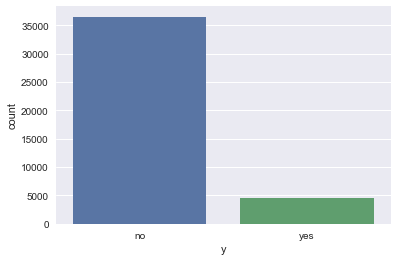

In [6]:
sns.set()
sns.countplot(data['y']);

As seen in the histogram above, the majority of clients do **not** subscribe to a term deposit.

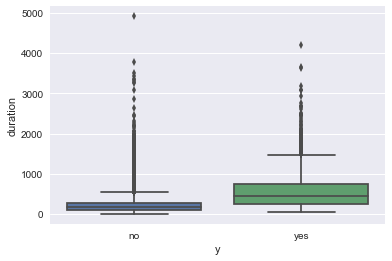

In [17]:
sns.boxplot(x='y', y='duration',data=data);

The **duration** is highly correlated with **y** however since the duration is not known before a call is performed it will be discarded in order to have a realistic predictive model.

Only duration was found to be significant among the independent variables.

### Classification

In [24]:
data['y'] = data['y'].replace({'no':0, 'yes':1})
data = data.drop(['age','duration','cons.conf.idx','job','default','housing','contact','previous','emp.var.rate', 
                  'cons.price.idx','euribor3m','nr.employed'],axis=1)
data_onehot = pd.get_dummies(data, columns=['marital','education','loan','month','day_of_week','poutcome'])
print(data_onehot.head())

   campaign  pdays  y  marital_divorced  marital_married  marital_single  \
0         1    999  0                 0                1               0   
1         1    999  0                 0                1               0   
2         1    999  0                 0                1               0   
3         1    999  0                 0                1               0   
4         1    999  0                 0                1               0   

   marital_unknown  education_basic.4y  education_basic.6y  \
0                0                   1                   0   
1                0                   0                   0   
2                0                   0                   0   
3                0                   0                   1   
4                0                   0                   0   

   education_basic.9y        ...         month_oct  month_sep  \
0                   0        ...                 0          0   
1                   0        ...        

In [25]:
from sklearn.model_selection import train_test_split

# create training and testing vars
X = data_onehot.drop('y',axis=1)
y = data_onehot['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Evaluate Dummy Classifier to form a baseline

from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

y_dummy_predictions = dummy_majority.predict(X_test)

dummy_majority.score(X_test, y_test)

0.8865015780529255

In [27]:
from sklearn.preprocessing import StandardScaler

# Load the standard scaler
sc = StandardScaler()

# Compute the mean and standard deviation based on the training data
sc.fit(X_train)

# Scale the training data to be of mean 0 and of unit variance
X_train_std = sc.transform(X_train)

# Scale the test data to be of mean 0 and of unit variance
X_test_std = sc.transform(X_test)

### Gaussian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

# Initialize classifier
gnb = GaussianNB()

# Train classifier
model = gnb.fit(X_train_std, y_train)

# Make predictions
preds = gnb.predict(X_test_std)

# Evaluate accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, preds))

0.8811604758436514


Dummy classifier performs slightly better than Gaussian NB classifier. This tells us that *accuracy* will not be a good measure for the model. Since we want to increase the fraction of predictions correctly identified as positive, we should use **_recall_** as our evaluation measure.

In [31]:
from sklearn.metrics import confusion_matrix, recall_score

print(confusion_matrix(y_test, preds))
print(recall_score(y_test, preds))

[[6943  360]
 [ 619  316]]
0.33796791443850266
